# Principle Component Analysis

In [1]:
import numpy as np
import copy

def deviation(X):
    
    means = np.mean(X, axis=0)
    
    data_deviate = []
    for i in range(len(X)):
        data_deviate.append(X[i] - means)
        
    data_deviate = np.array(data_deviate)
    
    return data_deviate

def standardize(A):
    
    means = np.mean(X, axis=1)
    stds = np.std(X, axis=1, ddof=1)
    row, col = np.shape(X)
    
    data_standard = []
    for i in range(row):
        
        standard = []
        for j in range(col):
            standard.append((X[i][j] - means[i]) / stds[i])
            
        data_standard.append(standard)
        
    for i in range(row):
        for j in range(col):
            data_standard[i][j] = round(data_standard[i][j], 3)
    
    return data_standard


def variance(X):
    
    means = np.mean(X, axis=0)
    var = sum(deviation(X)[i] ** 2 for i in range(len(X))) / (len(X)-1)
    
    return var

def covariance(x, y):
    
    cov = sum(deviation(x)[k] * deviation(y)[k] for k in range(len(x))) / (len(x)-1)
    
    return cov
    
def varcov_matrix(A):
    
    A = np.array(A)
    n = len(A)
    
    varcov_matrix = np.empty([n,n])
    for i in range(n):
        for j in range(n):
            
            if i == j:
                varcov_matrix[i][j] = variance(A[i])
            else:
                varcov_matrix[i][j] = covariance(A[i], A[j])
                
    for i in range(n):
        for j in range(n):
            varcov_matrix[i][j] = round(varcov_matrix[i][j], 3)
                
    return varcov_matrix

def qr_factorization(A):
    """
    Applies the Gram-Schmidt method to A
    and returns Q and R, so Q*R = A.
    """
    A = np.array(A)
    row, col = A.shape

    Q = np.empty((row, row)) 
    q_tilde = np.empty((row, row)) 

    q_tilde[:, 0] = A[:, 0]
    Q[:, 0] = q_tilde[:, 0] / np.linalg.norm(q_tilde[:, 0])

    for i in range(1, row):

        q_tilde[:, i] = A[:, i]
        for j in range(i):
            q_tilde[:, i] -= np.dot(A[:, i], Q[:, j]) * Q[:, j] 

        Q[:, i] = q_tilde[:, i] / np.linalg.norm(q_tilde[:, i]) 

    R = np.zeros((row, col))
    for i in range(row):
        for j in range(i, col):
            R[i, j] = np.dot(A[:, j], Q[:, i])

    return Q, R

def orthogonal_iteration_qr(A, tol):
    
    e_vecs = 1
    e_vals = []
    while A[0][1] > tol:
        
        q, r = qr_factorization(A)
        A = np.dot(r, q)
        e_vecs = np.dot(e_vecs,q)
        
    for i in range(len(A)):
        e_vals.append(A[i][i])
    
    return e_vals, e_vecs

def pca(X, k):
    
    means = np.mean(X, axis=1)
    stds = np.std(X, axis=1, ddof=1)
    row, col = np.shape(X)
    
    data_deviate = []
    for i in range(row):
        
        deviation = []
        for j in range(col):
            deviation.append(X[i][j] - means[i])
            
        data_deviate.append(deviation)
        
    cov_x = varcov_matrix(X)
    
    _, e_vecs = orthogonal_iteration_qr(cov_x, tol=1e-5)

    feature = np.transpose(e_vecs[:, 0:k])
    data_recast = np.dot(feature, data_deviate)

    #for i in range(len(e_vecs)):
    #    for j in range(data_recast.shape[1]):
    #        data_recast[i][j] *= -1

    return data_recast

[[ 1.03075002 -2.1901222   1.17853384  0.32364242  2.07231839  1.10075265
  -0.08789244 -1.40664764 -0.53832044 -1.48301461]
 [-0.2122005   0.16892304  0.47581472  0.16115034 -0.2510891   0.21842768
  -0.42999183  0.05295923  0.02043421 -0.2044278 ]]


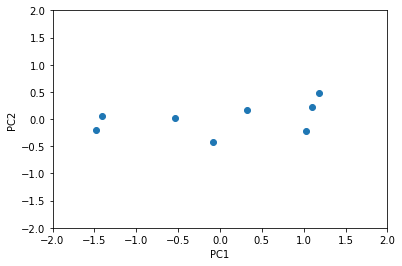

In [2]:
import matplotlib.pyplot as plt
X = np.array([[2.5,0.5,2.2,1.9,3.1,2.3,2.0,1.0,1.5,1.1],[2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]])
data = pca(standardize(X), k=2)

print(data)
plt.scatter(data[0],data[1])
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

[[-0.1075, -0.0016, 0.4635, 0.1522, -0.0731, 0.2486, -0.3567, -0.0464, -0.0178, -0.2612], [-0.8394, 1.7833, -0.9578, -0.2627, -1.6873, -0.8958, 0.0705, 1.1446, 0.438, 1.2067]]


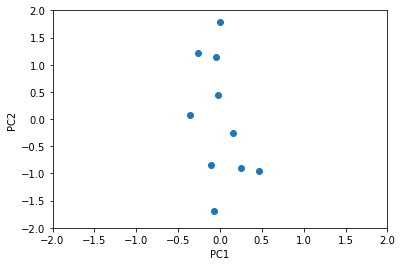

In [3]:
data = [[-0.1075,-0.0016,0.4635,0.1522,-0.0731,0.2486,-0.3567,-0.0464,-0.0178,-0.2612],
        [-0.8394,1.7833,-0.9578,-0.2627,-1.6873,-0.8958,0.0705,1.1446,0.4380,1.2067]]
    
print(data)
plt.scatter(data[0],data[1])
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [4]:
p = np.array([[1,2,3],[3,4,5],[5,6,7]])
a = p[:,0:2]
b = p[:,1]
c = p[:,2]
print(a)

[[1 2]
 [3 4]
 [5 6]]


In [5]:
X = [
[82,87,94,101,107,114,115,112,112,103,94,83],   
[77,81,87,94,104,109,110,108,107,97,89,81],   
[76,73,72,82,88,92,95,97,93,88,78,75],   
[78,83,91,100,107,110,113,112,111,102,90,77],   
[93,92,98,105,104,109,109,105,111,111,101,92],   
[95,95,98,106,102,112,108,105,113,108,100,92],   
[80,83,88,96,106,117,118,115,116,106,89,78],   
[76,78,88,95,105,115,114,112,109,104,87,74],   
[88,90,93,98,97,101,99,98,111,107,100,88],   
[79,81,87,94,97,103,99,98,106,102,86,76],   
[86,87,94,96,101,109,109,105,104,103,97,89],   
[89,89,95,103,105,110,104,104,106,108,96,90]]

X_new = pca(X, 3)
print(X_new)

[[-50.80316778 -43.71015634 -24.07388296  -0.28152838  18.6327585
   40.94931581  40.21381899  34.03540041  38.20574991  18.79745274
  -19.90318953 -52.06257138]
 [  2.24314159   1.00029656  -3.55688004  -5.76884842   3.46689595
   -0.11345794   6.16737323   8.87296823  -6.3972155   -8.72056916
   -3.02037997   5.82667548]
 [  4.16569682  -1.15779332  -6.13873951  -0.54047798  -3.94966836
   -1.18091469  -1.56686161   0.20668623   5.20640627   5.82287236
   -0.53137217  -0.33583404]]
